In [80]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
df = pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [81]:
#check if the necessary columns are numerical values
df.drop('customerID', axis='columns', inplace=True )
df.drop('InternetService', axis='columns', inplace = True)
df.drop('Contract', axis='columns', inplace = True)
df.drop('PaymentMethod', axis='columns', inplace = True)
df
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [82]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [83]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [84]:
#convert TotalCharges to numerical values
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,Yes,No,Yes,Yes,Yes,No,Yes,52.55,,No
753,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,Yes,Yes,Yes,Yes,Yes,No,No,56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,73.35,,No


In [85]:
df.iloc[488]['TotalCharges']

' '

In [86]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 17)

In [87]:
df1.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [88]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtypes

C:\Users\chikwizo\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('float64')

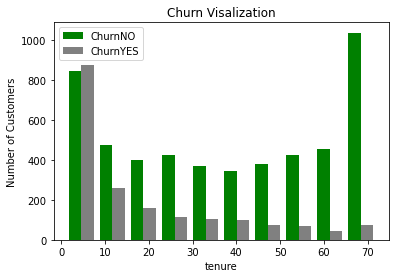

In [89]:
#churn visualization with respect to tenure
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Churn Visalization")


plt.hist([tenure_churn_no,tenure_churn_yes], color=['green', 'gray'], label=['ChurnNO','ChurnYES'])
plt.legend()

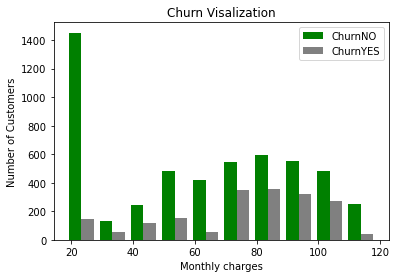

In [90]:
#churn visualization with respect to monthly charges
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel("Monthly charges")
plt.ylabel("Number of Customers")
plt.title("Churn Visalization")


plt.hist([tenure_churn_no,tenure_churn_yes], color=['green', 'gray'], label=['ChurnNO','ChurnYES'])
plt.legend()

In [91]:
def print_unique_column_values(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}: {df[column].unique()}')
print_unique_column_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']
Churn: ['No' 'Yes']


In [92]:
df1.replace('No internet service', 'No',inplace=True )
df1.replace('No phone service', 'No',inplace=True )
df1

C:\Users\chikwizo\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,No,Yes,No,No,No,No,Yes,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,No,No,No,No,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Yes,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,Yes,No,Yes,Yes,No,No,No,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,Yes,No,No,No,No,No,Yes,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,No,No,No,No,No,No,Yes,74.40,306.60,Yes


In [93]:
print_unique_column_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
PaperlessBilling: ['Yes' 'No']
Churn: ['No' 'Yes']


In [94]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)
df1

C:\Users\chikwizo\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0
1,Male,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0
2,Male,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1
3,Male,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0
4,Female,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0
7040,Female,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0
7041,Male,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1


In [95]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace = True)
df1

C:\Users\chikwizo\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0
7039,1,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0
7040,1,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0
7041,0,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1


In [96]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
PaperlessBilling      int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [97]:
scale_cols =['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_cols] = scaler.fit_transform(df1[scale_cols])
df1

<ipython-input-97-1be79116c90b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[scale_cols] = scaler.fit_transform(df1[scale_cols])
C:\Users\chikwizo\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,0
7039,1,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0
7040,1,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,0
7041,0,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,1


In [98]:
x = df1.drop('Churn', axis='columns')
y = df1['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [99]:
x_train.shape

(5625, 16)

In [100]:
x_test.shape

(1407, 16)

In [101]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
5664,1,1,0,0,0.126761,1,0,0,0,1,0,0,1,1,0.660199,0.097709
101,1,0,1,1,0.000000,1,0,0,0,0,0,0,0,0,0.011940,0.000075
2621,0,0,1,0,0.985915,1,0,0,1,1,1,1,1,1,0.605473,0.639978
392,1,1,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.259204,0.008135
1327,0,0,1,0,0.816901,1,1,0,0,1,0,1,1,1,0.808458,0.685703
3607,1,0,0,0,0.169014,1,0,1,0,0,1,0,0,0,0.367164,0.083556
2773,0,0,1,0,0.323944,0,0,0,0,1,0,0,0,0,0.107960,0.077221
1936,1,0,1,0,0.704225,1,0,1,1,0,1,0,0,1,0.420398,0.360760
5387,0,0,0,0,0.042254,0,0,0,0,0,1,0,0,0,0.121891,0.011493
4331,0,0,0,0,0.985915,1,1,0,0,0,0,0,0,0,0.072637,0.216859


In [102]:
len(x_train.columns)

16

In [114]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(15, input_shape=(16,), activation='relu'),
    keras.layers.Dense(15, activation='sigmoid'),
])
model.compiler(optimizer='adam', 
               loss='binary_crossentropy',
               metrics=['accuracy'])

model.fit(x_train,y_train ,epochs=100)

ModuleNotFoundError: No module named 'tensorflow'

In [104]:
model.evaluate(x_test, y_test)

NameError: name 'model' is not defined

In [105]:
yp = model.predict(x_test
yp[:5]

SyntaxError: invalid syntax (<ipython-input-105-c57467013931>, line 2)

In [106]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [107]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

NameError: name 'yp' is not defined

In [108]:
y_pred[:10]

[]

In [109]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1407, 0]

In [110]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize = (10.7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

NameError: name 'tf' is not defined